In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Predict Gross Profit

Requeriments: Expected Revenue, Expected COGS (Cost of Goods Sold)

Start by performing 1000 simulations of the company's expected values

In [3]:
rev_m = 170 # Revenue mean in million of dollars (assumed)
rev_stdev = 20 #Revenue standar deviation in million of dollars (assumed)
iterations = 1000

In [4]:
rev = np.random.normal(rev_m,rev_stdev,iterations) #Generate 1000 random normal numbers with these parameters
rev

array([158.67112477, 174.31361032, 143.18649489, 162.44892275,
       153.55692257, 178.61278138, 182.57213172, 160.94513341,
       174.19540562, 144.38446411, 189.80325929, 141.96282568,
       187.49522465, 157.67352401, 206.54125044, 114.79039987,
       189.88766346, 174.18506101, 175.67383734, 157.72505513,
       161.08818439, 163.27452649, 150.43314926, 152.25678814,
       143.99749467, 181.78639711, 197.09369178, 185.81500849,
       158.14432346, 167.67471492, 176.55194946, 187.16083052,
       168.18251523, 186.5271848 , 180.7996548 , 150.15457377,
       129.28998608, 156.1231135 , 180.71955629, 174.04493974,
       165.46633127, 173.67758083, 151.54831967, 200.3608225 ,
       153.02894749, 173.02142088, 149.00453995, 172.57084875,
       161.13227594, 139.94032782, 190.16337204, 150.16944983,
       139.31882972, 152.25604702, 149.90128599, 201.64091859,
       154.96715431, 172.17179512, 175.88157958, 183.79577049,
       163.48428741, 175.25142646, 167.77577694, 156.95

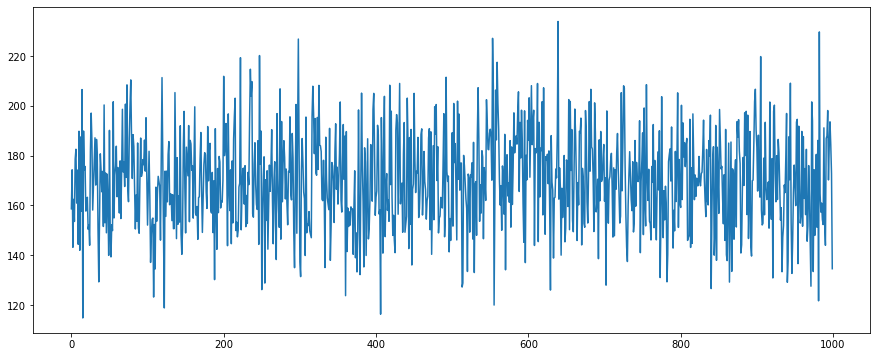

In [5]:
plt.figure(figsize=(15,6))
plt.plot(rev)
plt.show()

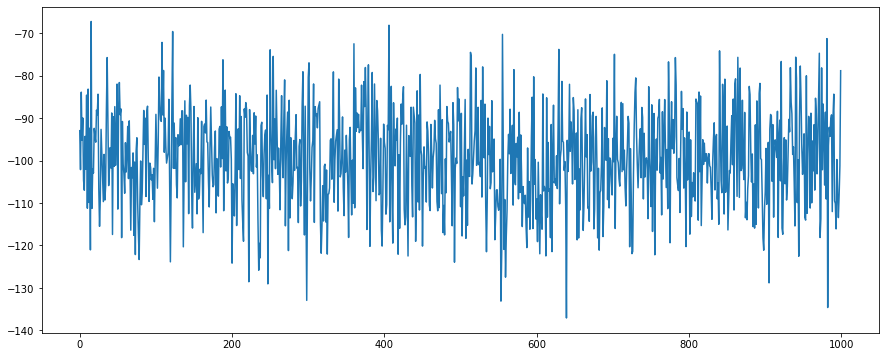

In [6]:
COGS = - (rev * np.random.normal(0.6,0.1))

plt.figure(figsize=(15,6))
plt.plot(COGS)
plt.show()

In [7]:
COGS.mean()

-99.62054542631685

In [8]:
COGS.std()

11.387469152166524

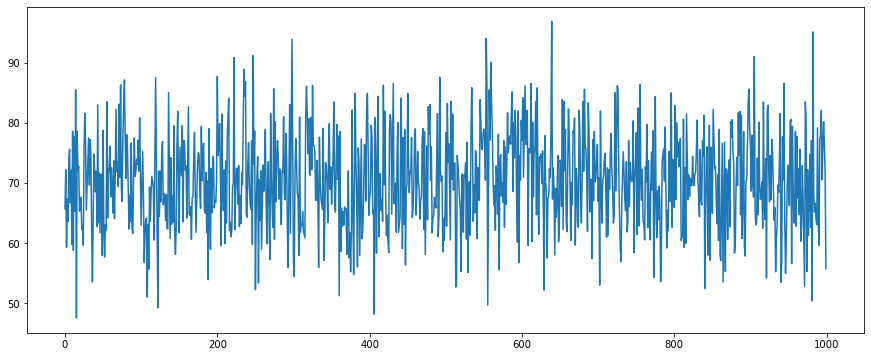

In [9]:
Gross_Profit = rev + COGS
Gross_Profit

plt.figure(figsize=(15,6))
plt.plot(Gross_Profit)
plt.show()

In [10]:
max(Gross_Profit)

96.84309439488749

In [11]:
min(Gross_Profit)

47.52669217124361

In [12]:
Gross_Profit.mean()

70.38914681592146

In [13]:
Gross_Profit.std()

8.046073574315914

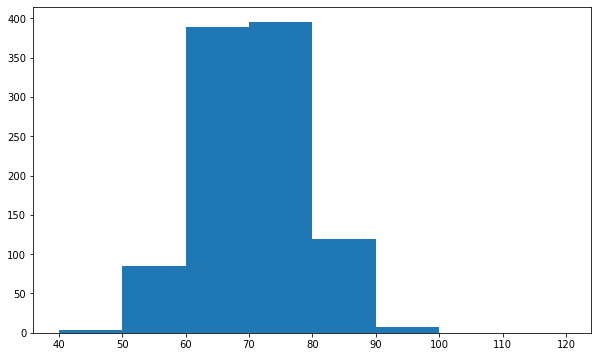

In [14]:
plt.figure(figsize=(10,6));
plt.hist(Gross_Profit, bins = [40,50,60,70,80,90,100,110,120]);
plt.show()

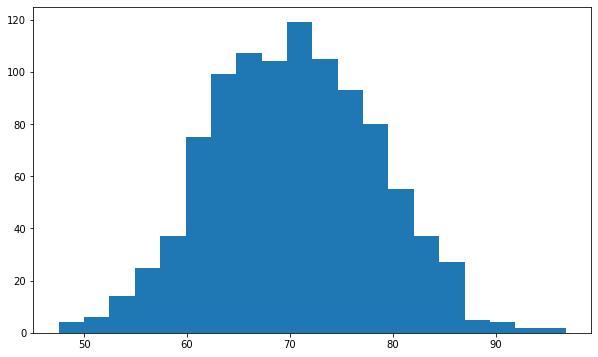

In [15]:
plt.figure(figsize=(10,6));
plt.hist(Gross_Profit,bins=20);
plt.show()

### Forecasting Stock Prices

In [16]:
import pandas as pd
from scipy.stats import norm

In [17]:
data = mydata=pd.read_csv('PG_2007_2017.csv',index_col='Date')
data.head()

,PG
Date,
2007-01-03,46.849339
2007-01-04,46.493664
2007-01-05,46.094406
2007-01-08,46.196045
2007-01-09,46.079914


In [18]:
log_returns = np.log(1+data.pct_change()) #Estimate the historical log returns

In [19]:
log_returns.tail()

,PG
Date,
2017-04-04,0.002562
2017-04-05,0.000667
2017-04-06,-0.006356
2017-04-07,-0.001903
2017-04-10,0.002910


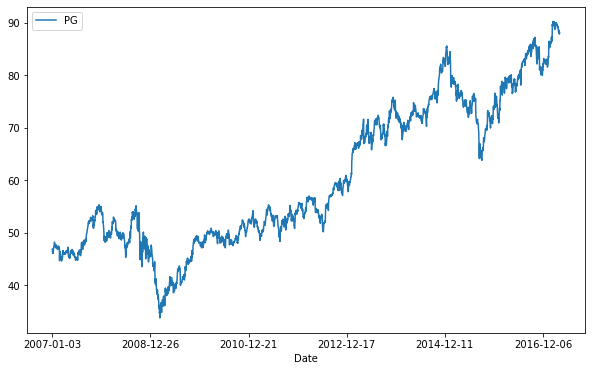

In [20]:
data.plot(figsize=(10,6));

<AxesSubplot:xlabel='Date'>

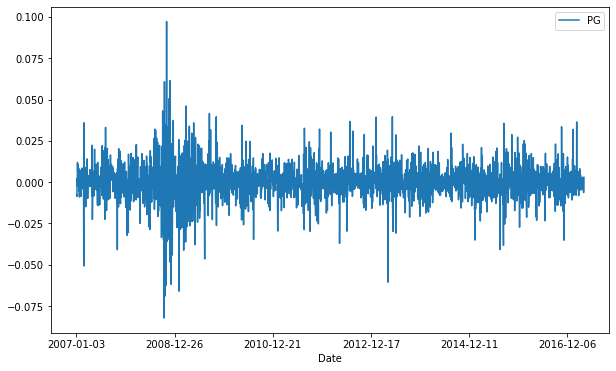

In [21]:
log_returns.plot(figsize=(10,6))

In [22]:
u = log_returns.mean()
u

PG    0.000244
dtype: float64

In [23]:
var = log_returns.var()
var

PG    0.000124
dtype: float64

drift = u - 1/2*var

In [24]:
drift = u - (0.5*var)
drift

PG    0.000182
dtype: float64

In [25]:
stdev = log_returns.std()
stdev

PG    0.011138
dtype: float64

In [26]:
np.array(drift)

array([0.00018236])

In [29]:
x=np.random.rand(10,2)
x

array([[0.3130222 , 0.84343699],
       [0.01956839, 0.90903882],
       [0.49806373, 0.07284145],
       [0.72743485, 0.51446407],
       [0.84460123, 0.667268  ],
       [0.33679691, 0.04965548],
       [0.97425333, 0.67871184],
       [0.13721518, 0.91173609],
       [0.16083176, 0.25547993],
       [0.25871002, 0.16452825]])

In [30]:
Z = norm.ppf(np.random.rand(10,2)) #Z is th distance between the mean and the events, expressed as the number of st deviations
Z

array([[ 1.79633583, -0.3503914 ],
       [-0.25828619,  0.17574191],
       [-0.29617734,  0.38764914],
       [ 1.53562629, -1.41502485],
       [-1.7866949 , -0.02227373],
       [ 1.66335417,  2.41943114],
       [-0.88778467, -0.84639698],
       [-0.1083821 ,  0.51598262],
       [-0.02405113, -2.65346022],
       [-0.28318858,  0.01691171]])

In [31]:
t_intervals = 1000
iterations = 10

daily_returns = e^r; r=drift + stdev*z

In [32]:
daily_returns = np.exp(drift.values + stdev.values*norm.ppf(np.random.rand(t_intervals,iterations)))
daily_returns

array([[0.99211345, 0.9928182 , 1.00114435, ..., 0.99863643, 1.00297344,
        1.01793805],
       [0.9842037 , 0.99967889, 0.99804238, ..., 0.98948093, 1.00314445,
        0.99892115],
       [1.00577869, 0.99110005, 1.01568293, ..., 0.99711559, 0.97100022,
        0.99366234],
       ...,
       [0.99774882, 0.99179221, 1.01044374, ..., 0.98680219, 0.99780633,
        1.00799147],
       [0.99116923, 0.98661925, 1.00084611, ..., 1.00972429, 1.00831306,
        0.97767759],
       [1.00744055, 0.98437628, 0.99242747, ..., 0.99661153, 0.98311791,
        0.99144192]])

In [33]:
S0=data.iloc[-1]

In [34]:
price_list = np.zeros_like(daily_returns)

In [35]:
price_list[0] = S0

In [36]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t-1]*daily_returns[t]

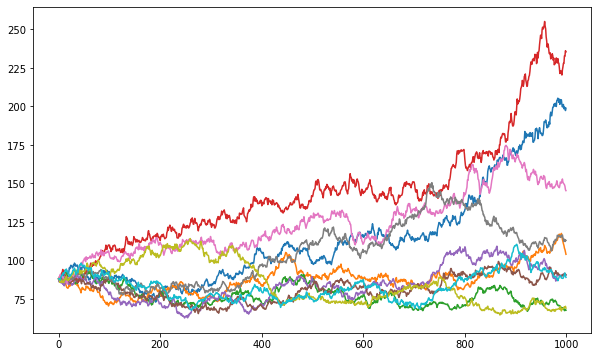

In [37]:
plt.figure(figsize=(10,6))
plt.plot(price_list);

### Derivatives

#### Black Scholes Formula for Option Pricing